In [1]:
from dask.base import visualize, compute

In [2]:
from dask.distributed import Client, progress
client = Client()
client

/opt/conda/lib/python3.8/site-packages/distributed/client.py:1146: VersionMismatchWarning: Mismatched versions found

+---------+---------------+---------------+---------------+
| Package | client        | scheduler     | workers       |
+---------+---------------+---------------+---------------+
| python  | 3.8.6.final.0 | 3.8.0.final.0 | 3.8.0.final.0 |
+---------+---------------+---------------+---------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Client Scheduler: tcp://scheduler:8786 Dashboard: http://scheduler:8787/status,Cluster Workers: 5 Cores: 60 Memory: 156.34 GiB


In [3]:
client.cluster

In [3]:
import dask
from typing import Dict, Any
from copy import deepcopy
import time


def sleeper(input_1=None, input_2=2, input_3=False):
    #
    # run container and pass parameters
    #
    # sparc_runner("slepper.", input_...)

    print(input_2+1)
    time.sleep(input_2+1)
    outputs = {"output_1": None, "output_2": input_2}
    return outputs



In [4]:
y = dask.delayed(sleeper)({"input_2": 1})


In [6]:
y.compute()

{'output_1': None, 'output_2': 2}

This is how it would look assembling it by hand

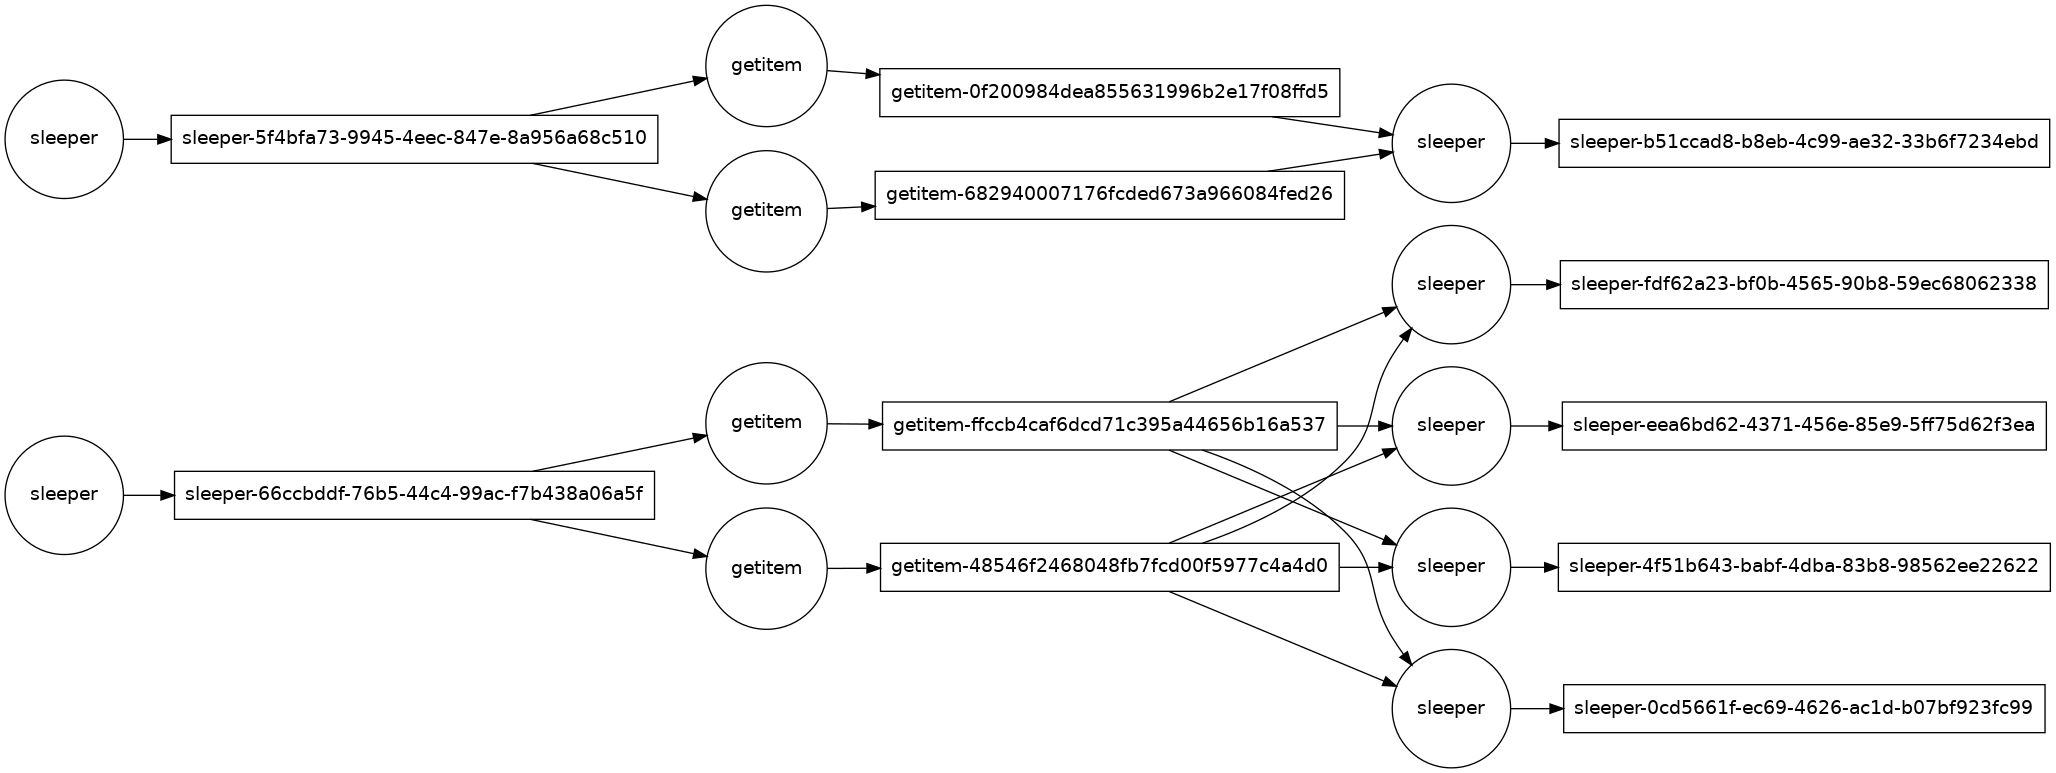

In [8]:
from dask.base import visualize

outs = []
out98 = dask.delayed(sleeper)(input_2=10)
oute9 = dask.delayed(sleeper)(input_2=10)

outc7 = dask.delayed(sleeper)(input_1=out98["output_1"], input_2=out98["output_2"])
out53 = dask.delayed(sleeper)(input_1=out98["output_1"], input_2=out98["output_2"])
out40 = dask.delayed(sleeper)(input_1=out98["output_1"], input_2=out98["output_2"])
out2d = dask.delayed(sleeper)(input_1=out98["output_1"], input_2=out98["output_2"])

outaf = dask.delayed(sleeper)(input_1=oute9["output_1"], input_2=oute9["output_2"])


outs = [out98, oute9, outc7, out53, out40, out2d, outaf]
visualize(outs, rankdir='LR', verbose=True)

In [9]:
compute(outs)

([{'output_1': None, 'output_2': 10},
  {'output_1': None, 'output_2': 10},
  {'output_1': None, 'output_2': 10},
  {'output_1': None, 'output_2': 10},
  {'output_1': None, 'output_2': 10},
  {'output_1': None, 'output_2': 10},
  {'output_1': None, 'output_2': 10}],)

In [11]:
del outs

NameError: name 'outs' is not defined

In [4]:
import json

with open("project.json") as fp:
    project = json.load(fp)

workbench = project["workbench"]


In [5]:
nouts = {}
def get_val(v):
    if isinstance(v, dict):
        return nouts[v["nodeUuid"]][v["output"]]
    return v


for nid, node in workbench.items():
    nins = {name: get_val(value) for name, value in node["inputs"].items()}
    nouts[nid] = dask.delayed(sleeper)(**nins)



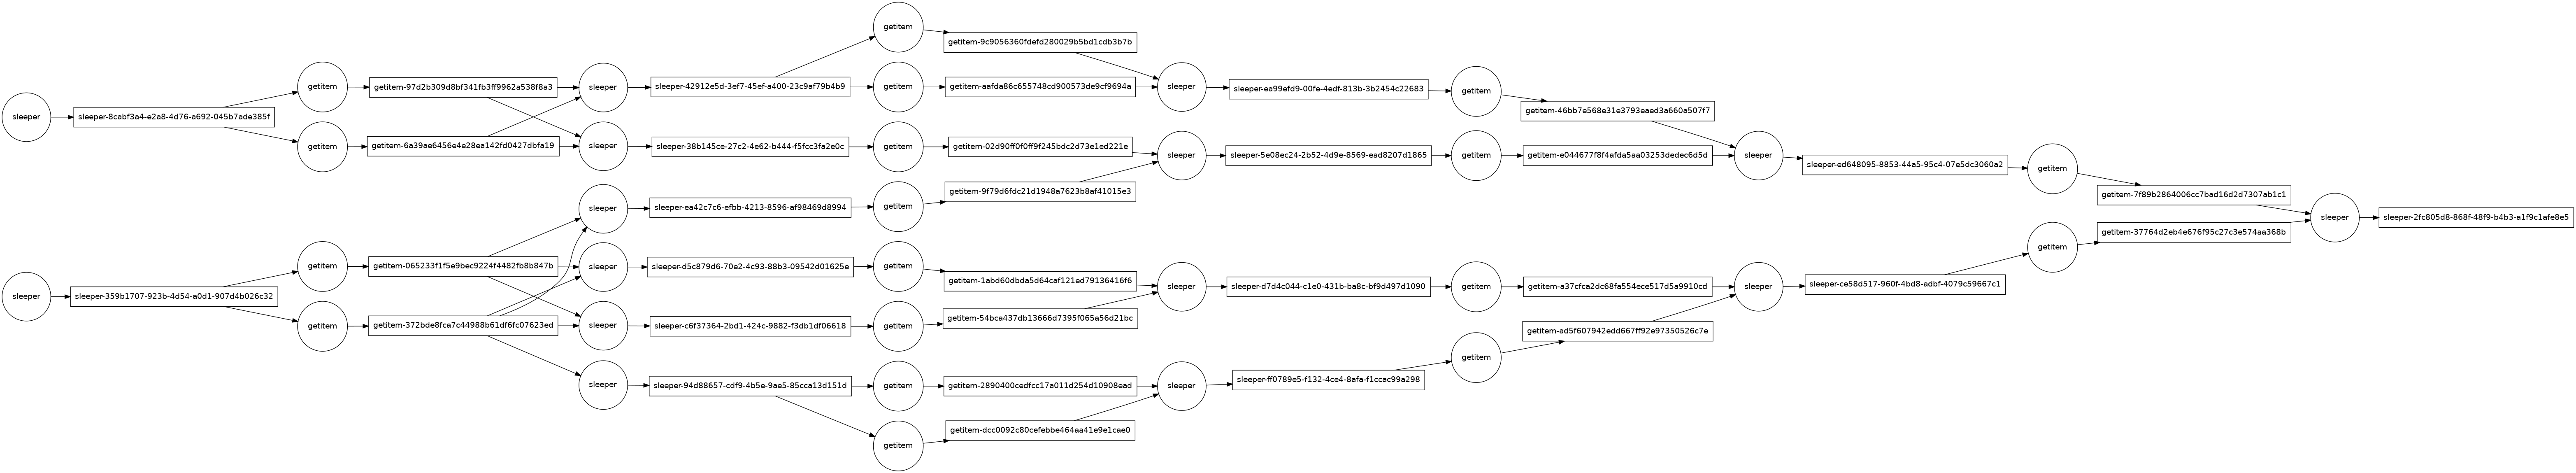

In [6]:
visualize( list(nouts.values()), rankdir='LR', collapse_outputs=False, optimize_graph=True, verbose=True)

In [7]:
dask.persist(list(nouts.values()))

([Delayed('sleeper-359b1707-923b-4d54-a0d1-907d4b026c32'),
  Delayed('sleeper-8cabf3a4-e2a8-4d76-a692-045b7ade385f'),
  Delayed('sleeper-94d88657-cdf9-4b5e-9ae5-85cca13d151d'),
  Delayed('sleeper-d5c879d6-70e2-4c93-88b3-09542d01625e'),
  Delayed('sleeper-c6f37364-2bd1-424c-9882-f3db1df06618'),
  Delayed('sleeper-ea42c7c6-efbb-4213-8596-af98469d8994'),
  Delayed('sleeper-38b145ce-27c2-4e62-b444-f5fcc3fa2e0c'),
  Delayed('sleeper-42912e5d-3ef7-45ef-a400-23c9af79b4b9'),
  Delayed('sleeper-ff0789e5-f132-4ce4-8afa-f1ccac99a298'),
  Delayed('sleeper-d7d4c044-c1e0-431b-ba8c-bf9d497d1090'),
  Delayed('sleeper-5e08ec24-2b52-4d9e-8569-ead8207d1865'),
  Delayed('sleeper-ea99efd9-00fe-4edf-813b-3b2454c22683'),
  Delayed('sleeper-ce58d517-960f-4bd8-adbf-4079c59667c1'),
  Delayed('sleeper-ed648095-8853-44a5-95c4-07e5dc3060a2'),
  Delayed('sleeper-2fc805d8-868f-48f9-b4b3-a1f9c1afe8e5')],)

In [16]:
dask.persist([list(nouts.values()) for i in range(3)])

([[Delayed('sleeper-0592a3c0-dcc2-45c3-8e28-4c6a2a3fb883'),
   Delayed('sleeper-202b6ae6-d775-48e3-8d42-79b1cff0e4ed'),
   Delayed('sleeper-fe531666-ee34-4ef4-bcab-f0f81291b77d'),
   Delayed('sleeper-8f0a15ac-5868-4e10-a2bf-d28e4e54ee2c'),
   Delayed('sleeper-282a2139-8265-4a60-b07c-356d227d52c6'),
   Delayed('sleeper-362e3eca-4993-4b56-a9db-1d2305eb5735'),
   Delayed('sleeper-e39b973b-67eb-42cf-be3e-67820f3f25ea'),
   Delayed('sleeper-4660cf75-1907-4352-ae89-066ddd67680b'),
   Delayed('sleeper-2d03adae-187f-473a-a7c5-1c99daad2869'),
   Delayed('sleeper-832c8a16-f48f-4595-bc40-19e6c9156641'),
   Delayed('sleeper-7bbff08f-d53d-4543-a11c-bfc7f10ba6a2'),
   Delayed('sleeper-14d41775-5a53-4eac-a1dd-84c0184b7603'),
   Delayed('sleeper-a9697b97-53de-43fe-af7b-c1b868bc44eb'),
   Delayed('sleeper-01c84d6f-082b-4086-b3b5-b1432ce001e9'),
   Delayed('sleeper-b2dbf6f2-368d-4ca6-a771-76f7be2223f5')],
  [Delayed('sleeper-0592a3c0-dcc2-45c3-8e28-4c6a2a3fb883'),
   Delayed('sleeper-202b6ae6-d775-48e3-

In [23]:
def heavy_run(x):
    y = x + 3
    import time
    time.sleep(1)
    return y

In [24]:
import numpy as np
future = client.submit(heavy_run, np.linspace(0,100,2))

In [25]:
future

<Future: pending, key: heavy_run-2cb395e070b3604249adc51d7daa34b4>

In [21]:
future


<Future: finished, type: builtins.NoneType, key: heavy_run-f336768207a3e75f9efea09214d86479>

In [26]:
future.result()

array([  3., 103.])

In [27]:
del future